In [7]:
import pandas as pd

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.drop(columns='User ID',inplace=True)

In [5]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True,dtype=int)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [8]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=42)


In [10]:
y_train

247    1
110    0
16     1
66     0
153    0
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchased, Length: 300, dtype: int64

In [11]:
x_train.shape

(300, 3)

In [11]:
import tensorflow as tf


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Activation

In [15]:
tf.random.set_seed(42)
model=Sequential()
model.add(Dense(20,activation='relu',input_dim=3))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                80        
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 3         
                                                                 
Total params: 125 (500.00 Byte)
Trainable params: 125 (500.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [18]:
checkpoint_cb=ModelCheckpoint('My_checkpoints',monitor='val_loss', save_bes_only=True)

In [20]:
history=model.fit(x_train,y_train,epochs=100,callbacks=[checkpoint_cb],validation_data=(x_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 72ms/step - loss: 0.2429 - accuracy: 0.9067 - val_loss: 0.1914 - val_accuracy: 0.9300
Epoch 2/100
10/10 [==============================] - 1s 74ms/step - loss: 0.2425 - accuracy: 0.9067 - val_loss: 0.1910 - val_accuracy: 0.9300
Epoch 3/100
10/10 [==============================] - 1s 89ms/step - loss: 0.2420 - accuracy: 0.9067 - val_loss: 0.1909 - val_accuracy: 0.9200
Epoch 4/100
10/10 [==============================] - 1s 93ms/step - loss: 0.2417 - accuracy: 0.9067 - val_loss: 0.1910 - val_accuracy: 0.9200
Epoch 5/100
10/10 [==============================] - 1s 115ms/step - loss: 0.2415 - accuracy: 0.9067 - val_loss: 0.1918 - val_accuracy: 0.9200
Epoch 6/100
10/10 [==============================] - 1s 162ms/step - loss: 0.2412 - accuracy: 0.9067 - val_loss: 0.1923 - val_accuracy: 0.9200
Epoch 7/100
10/10 [==============================] - 1s 64ms/step - loss: 0.2411 - accuracy: 0.9067 - val_loss: 0.1926 - val_accuracy: 0.9300
Epoc

In [21]:
from tensorflow.keras.models import load_model
best_model=load_model("My_checkpoints")

In [ ]:
best_model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.3596 - accuracy: 0.9300


[0.3596119284629822, 0.9300000071525574]

In [58]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img,img_to_array,load_img

In [36]:
mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
for i in mnist.load_data():
  for j in i:
    print(j.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [37]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

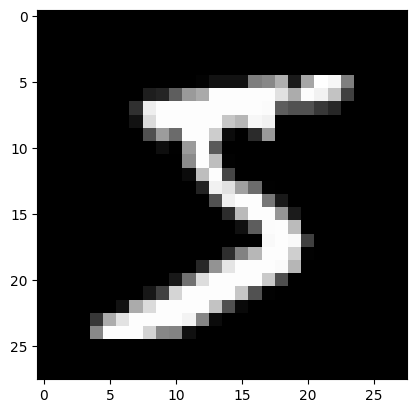

In [72]:
image=array_to_img(x_train[0].reshape(28,28,1))
plt.imshow(image,cmap='gray')
plt.show()

In [73]:
type(image)

PIL.Image.Image

In [64]:
from PIL import Image


In [49]:
x_train0_array

In [4]:
x_train,x_test=x_train/255.,x_test/255.
x_train.resize((60000,784))
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [5]:
x_test.resize((10000,784))
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
tf.random.set_seed(42)
model_mnist=Sequential()
model_mnist.add(Dense(50,kernel_initializer='he_normal',input_shape=(784,)))
model_mnist.add(BatchNormalization())
model_mnist.add(Activation('relu'))
model_mnist.add(Dense(50,kernel_initializer='he_normal'))
model_mnist.add(BatchNormalization())
model_mnist.add(Activation('relu'))
model_mnist.add(Dense(10,activation='softmax',kernel_initializer='he_normal'))

In [13]:
model_mnist.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 batch_normalization (Batch  (None, 50)                200       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 50)                0

In [14]:
model_mnist.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model_mnist.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 10s 4ms/step - loss: 0.3545 - accuracy: 0.8999 - val_loss: 0.1451 - val_accuracy: 0.9605
Epoch 2/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1676 - accuracy: 0.9501 - val_loss: 0.1258 - val_accuracy: 0.9626
Epoch 3/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1274 - accuracy: 0.9617 - val_loss: 0.1021 - val_accuracy: 0.9696
Epoch 4/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1089 - accuracy: 0.9662 - val_loss: 0.1067 - val_accuracy: 0.9666
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0899 - accuracy: 0.9715 - val_loss: 0.0903 - val_accuracy: 0.9742
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0819 - accuracy: 0.9740 - val_loss: 0.0899 - val_accuracy: 0.9722
Epoch 7/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0725 - accuracy: 0.9763 - val_loss: 0.0967 - val_accuracy

In [16]:
model_mnist.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9737


[0.11499298363924026, 0.9736999869346619]

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

(10000, 784)

In [24]:
import numpy as np
y_pred_prob=model_mnist.predict(x_test)
y_pred=y_pred_prob.argmax(axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [4]:
import matplotlib.pyplot as plt

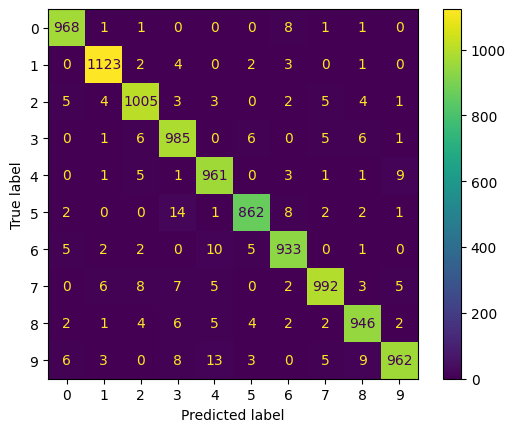

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

In [1]:
from sklearn.datasets import make_circles

In [74]:
x,y=make_circles(n_samples=250,noise=0.06,random_state=42)

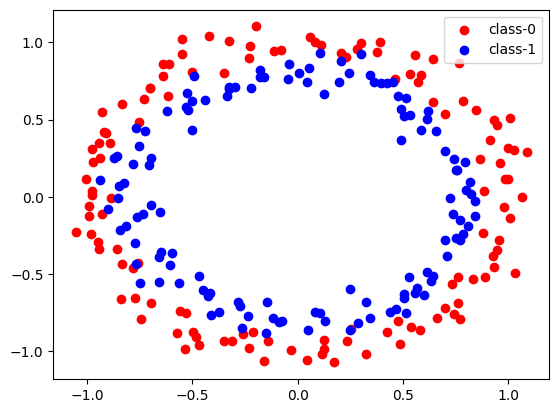

In [75]:
plt.scatter(x[y==0][:,0],x[y==0][:,1],color='r',label='class-0')
plt.scatter(x[y==1][:,0],x[y==1][:,1],color='b',label='class-1')
plt.legend()
plt.show()

In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [118]:
tf.random.set_seed(42)
model_circles=Sequential()
model_circles.add(Dense(50,activation='relu',input_shape=(2,),kernel_initializer='he_normal'))
model_circles.add(BatchNormalization())
model_circles.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model_circles.add(BatchNormalization())
model_circles.add(Dense(1,activation='sigmoid',kernel_initializer='he_normal'))

In [119]:
early_stopping=EarlyStopping(patience=10,min_delta=0.01,start_from_epoch=25)
model_circles.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [95]:
from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [97]:
x_train.shape

(200, 2)

In [120]:
model_circles.fit(x_train,y_train,epochs=100,callbacks=[early_stopping],validation_split=0.15)

Epoch 1/100
6/6 [==============================] - 2s 81ms/step - loss: 0.6862 - accuracy: 0.5941 - val_loss: 0.7082 - val_accuracy: 0.5333
Epoch 2/100
6/6 [==============================] - 0s 18ms/step - loss: 0.6589 - accuracy: 0.6118 - val_loss: 0.7029 - val_accuracy: 0.5333
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 0.6327 - accuracy: 0.6647 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 0.6278 - accuracy: 0.6412 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 13ms/step - loss: 0.5906 - accuracy: 0.7529 - val_loss: 0.6882 - val_accuracy: 0.5333
Epoch 6/100
6/6 [==============================] - 0s 17ms/step - loss: 0.5738 - accuracy: 0.7588 - val_loss: 0.6843 - val_accuracy: 0.5333
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 0.5683 - accuracy: 0.7471 - val_loss: 0.6782 - val_accuracy: 0.5333
Epoch 8/100
6/6 [===